In [5]:
import tensorflow as tf

In [6]:
print(tf.__version__)

2.15.0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
## divide the dataset into independent and dependent features

X = df.iloc[:,3:13]   # iloc = index location, [row_start:row_end, col_start: col_end]
y = df.iloc[:, 13]


In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
## feature engineering
## turn categorical columns to numeric

geography = pd.get_dummies(X['Geography'], drop_first = True)
## dropping first column to avoid multi-collinearity

gender = pd.get_dummies(X['Gender'], drop_first = True)


In [18]:
## concatenate these variables with dataframe.

X = X.drop(['Geography', 'Gender'], axis = 1) ## axis = 1 to drop the columns, not the rows


In [19]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [22]:
 ## concatenate

X = pd.concat([X, geography, gender], axis = 1)

In [23]:
# splitting the dataset into train set and test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size= 0.2, random_state =0)

**For which all algorithms, feature scaling is required?**
- anything that is distance based, feature scaling is required.
- whenever gradient descent is required, scaling is also required.



In [24]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [25]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [26]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [27]:
X_train.shape

(8000, 11)

# Creating the ANN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [29]:
# let's initialize the ANN
classifier = Sequential()


In [30]:
# Add the input layer
classifier.add(Dense(units = 11, activation = 'relu'))
# here the relu will be applied to the next layer.

In [52]:
# adding the first hidden layer.

classifier.add(Dense(units = 7,activation = 'relu' ))
classifier.add(Dropout(0.2))

In [53]:
# adding the second hidden layer

classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dropout(0.3))

In [54]:
# adding the output layer

classifier.add(Dense(1, activation ='sigmoid'))

In [55]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'] )

In [56]:
# Early Stopping

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [57]:
model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size = 10, epochs = 1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 6ms/step - loss: 0.5820 - accuracy: 0.7972 - val_loss: 0.5126 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5308 - accuracy: 0.7962 - val_loss: 0.5080 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5232 - accuracy: 0.7962 - val_loss: 0.5084 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.5131 - accuracy: 0.7962 - val_loss: 0.4993 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4992 - accuracy: 0.7962 - val_loss: 0.4865 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4892 - accuracy: 0.7962 - val_loss: 0.4788 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4900 - accuracy: 0.7962 - val_loss: 0.4733 - val_accuracy:

In [58]:
 model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

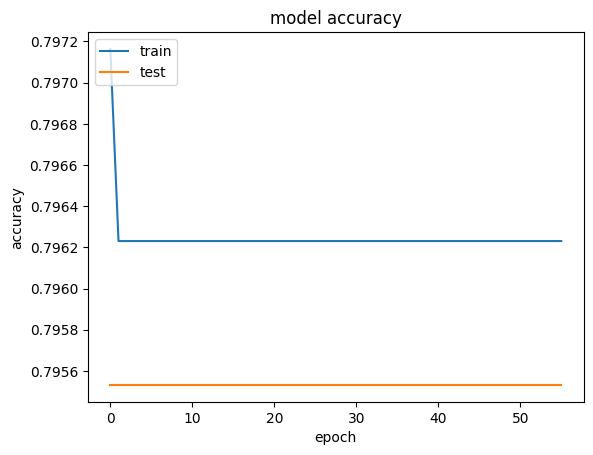

In [59]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

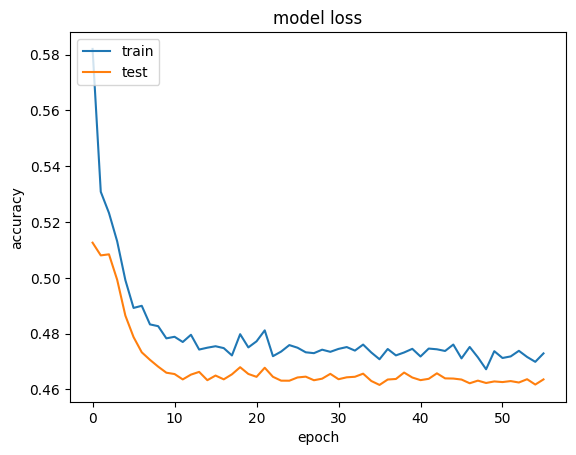

In [60]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
# prediction for the test data

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)
# greater than 0.5 will be taken as 1 else 0

63/63 [==============================] - 0s 2ms/step


In [62]:
# make the confusion matrics

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [63]:
# to calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [64]:
score

0.7975

In [65]:
# to know the value of weights assigned to neural network
# store them as a pickle file

classifier.get_weights()

[array([[-7.43195927e-03,  2.15163097e-01,  6.90234900e-02,
          2.69069746e-02, -1.99068382e-01, -7.24260136e-02,
         -1.77223027e-01, -3.35772812e-01, -8.07308778e-02,
          1.87274292e-01,  3.74702848e-02],
        [-4.57900167e-01, -9.60613787e-01, -5.80504797e-02,
         -9.05097842e-01, -6.21320307e-01,  2.18159392e-01,
         -1.03860581e+00,  7.51649201e-01, -2.58458287e-01,
          1.72431394e-01, -6.69627964e-01],
        [ 1.76392466e-01,  8.42160344e-01,  1.80828542e-01,
         -9.27092433e-02,  4.55748379e-01,  3.12113822e-01,
          1.23918220e-01,  2.56632149e-01,  2.32137188e-01,
         -4.32364613e-01,  1.72389507e-01],
        [-2.86574751e-01,  1.13858867e+00, -3.37660998e-01,
          2.23980565e-02, -1.01854098e+00, -2.48064511e-02,
         -1.57672763e-01, -8.24394941e-01, -3.50733161e-01,
         -7.70559967e-01, -5.07699430e-01],
        [-1.78508595e-01, -4.15170521e-01, -8.70720387e-01,
         -8.29648316e-01, -5.92595220e-01, -